# Amazon Pricing 

Preface | Value | Purpose

By running machine models on this pricing data, it can help amazon sellers plan to buy products so they can kb=now an estimated price range in the future, as a result, they can plan their finance well with respect to their budgets and priorites. They can know the trends ahead of time for this time period captured in August 2022.By analyzing previous market trends and price ranges, it can support upcoming developments Without bias, this helps both the buyers and sellers make their product purchasing decisions. 

* Regression Analysis: Predicting Net Profit

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv("C:\\Users\\Alexandria\\Documents\\Ecom_Project_Data\\ecom_keywords")

**1.) Mini EDA and visualizing our target variable price. The target variable is prices over time, so this is regression problem. I will use classical regression problems to predict the price.** 

In [6]:
df.head()

,Unnamed: 0,product_name,brand,price,monthly_sales,daily_sales,monthly_revenue,date_first_available,net,rating_number,rating,fees,product_rank,category,asin,link
0,0,Organic Bath Bombs - 25 Extra Large Pcs + 3 Bu...,Lagunamoon,23.99,3768.0,125.0,90394.0,03/08/2020,14.60,4550,4.4,9.39,6475.0,Beauty & Personal Care,B085NJ7ZNN,https://www.amazon.com/dp/B085NJ7ZNN
1,1,Bath Bombs 7 Natural Bath Bomb Gift Set Handma...,STNTUS INNOVATIONS,14.99,3082.0,102.0,46199.0,06/11/2019,7.60,1546,4.6,7.39,5648.0,Beauty & Personal Care,B07Q6BLNT6,https://www.amazon.com/dp/B07Q6BLNT6
2,2,LifeAround2Angels Bath Bombs Gift Set 12 USA m...,Lifearound2angels,21.44,11256.0,375.0,241329.0,01/25/2017,12.43,40630,4.8,9.01,672.0,Beauty & Personal Care,B01MFGN8S5,https://www.amazon.com/dp/B01MFGN8S5
3,3,Nagaliving Bath Bombs Gift Set 10 Organic Bubb...,nagaliving,9.99,4460.0,148.0,44555.0,11/11/2019,4.05,2634,4.4,5.94,5041.0,Beauty & Personal Care,B081DGZP4B,https://www.amazon.com/dp/B081DGZP4B
4,4,Bath Bombs for Women - 24 All Natural BathBomb...,Mineral Me California,25.45,1638.0,54.0,41687.0,08/17/2020,14.90,2317,4.7,10.55,9033.0,Beauty & Personal Care,B08G4DB4DB,https://www.amazon.com/dp/B08G4DB4DB


In [8]:
df.tail()

,Unnamed: 0,product_name,brand,price,monthly_sales,daily_sales,monthly_revenue,date_first_available,net,rating_number,rating,fees,product_rank,category,asin,link
5110,5110,Queen Lashes by Fitqueen Vegan & Cruelty free ...,Generic,11.98,148.0,5.0,1793.5,06/21/2022,6.26,4,5.0,5.22,1065336.0,unknown,B0B2VKJ95G,https://www.amazon.com/dp/B0B2VKJ95G
5111,5111,Colored Mascara Waterproof and Smudgeproof Lon...,Fpoqbod,3.59,148.0,5.0,1793.5,unknown,6.26,0,4.5,5.22,60767.0,unknown,B09QC8P6ZH,https://www.amazon.com/dp/B09QC8P6ZH
5112,5112,Beauty Without Cruelty Paraben-free Mascara Fu...,Beauty Without Cruelty,17.04,2.0,0.0,34.0,10/13/2013,10.94,365,4.3,6.10,320863.0,Beauty & Personal Care,B00B7V3XPU,https://www.amazon.com/dp/B00B7V3XPU
5113,5113,PuroBIO Certified Organic Impeccable Restructu...,puroBIO Certified Organic Cosmetics,16.90,0.0,0.0,0.0,02/14/2019,11.44,61,3.6,5.46,658156.0,Beauty & Personal Care,B00Z5ODHUG,https://www.amazon.com/dp/B00Z5ODHUG
5114,5114,Ardorlove Colored Eyelash Mascara - 7 Colors W...,Ardorlove,20.99,148.0,5.0,1793.5,07/27/2022,6.26,0,4.5,5.22,610532.0,unknown,B094J53JCQ,https://www.amazon.com/dp/B094J53JCQ


# Visualize Y: Our target variale is the price column. This is a single prediction

<AxesSubplot:>

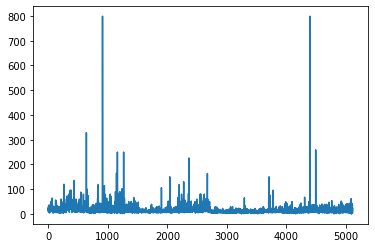

In [10]:
df.price.plot()

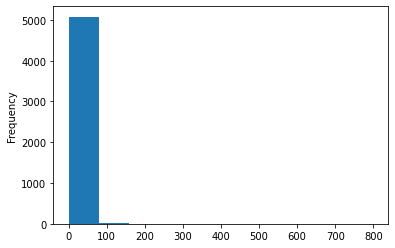

In [13]:
df.price.plot(kind= 'hist')
plt.show()

<AxesSubplot:>

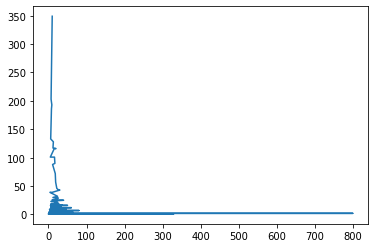

In [17]:
df['price'].value_counts().plot()

The price is centralized under $100. Here, I am visualizing our target varible to get a better understanding of the price behavior and how it behaves with it's shape

* 2.) Use train_test_split to create 2 variables: train, test.

* 3.) Keep the test set aside, don't touch it until step 8.

In [16]:
train, test = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 444)

In [18]:
train.head()

,Unnamed: 0,product_name,brand,price,monthly_sales,daily_sales,monthly_revenue,date_first_available,net,rating_number,rating,fees,product_rank,category,asin,link
2124,2124,50ft LED Lights for Bedroom FONEWE Music Sync ...,FONEWE,14.95,3551.0,118.0,53087.0,05/05/2021,8.94,1618,4.5,6.01,1050.0,Tools & Home Improvement,B0948Y346D,https://www.amazon.com/dp/B0948Y346D
1199,1199,Handmade wooden tree bark eco Friendly Pencil,Rich India,6.99,0.0,0.0,0.0,08/18/2020,2.17,0,4.5,4.82,720203.0,Office Products,B08G8SK4M6,https://www.amazon.com/dp/B08G8SK4M6
4536,4536,True + Luscious Super Moisture Lipstick Clean...,True + Luscious,22.00,624.0,20.0,13728.0,01/17/2009,6.26,820,4.0,5.22,38252.0,Beauty & Personal Care,B0761P7HMM,https://www.amazon.com/dp/B0761P7HMM
4339,4339,Dunwell 11x17 Sheet Protectors Landscape - (He...,Dunwell,12.99,416.0,13.0,5404.0,09/17/2020,5.90,488,4.6,7.09,16100.0,Office Products,B08C2YZ99C,https://www.amazon.com/dp/B08C2YZ99C
4252,4252,25 Count Diamond Clear Extra Heavyweight Sheet...,GOLD SEAL,4.88,1604.0,53.0,7828.0,03/08/2020,1.08,1222,4.8,3.80,4522.0,Office Products,B085PP4D5S,https://www.amazon.com/dp/B085PP4D5S


In [19]:
train.shape

(4092, 16)

In [20]:
test.shape

(1023, 16)

**Next Steps**

* 3)  Leave testing set for later steps 
* 4)  Preprocess training set

In [22]:
train.drop('Unnamed: 0', axis = 1, inplace = True)

In [23]:
train

,product_name,brand,price,monthly_sales,daily_sales,monthly_revenue,date_first_available,net,rating_number,rating,fees,product_rank,category,asin,link
2124,50ft LED Lights for Bedroom FONEWE Music Sync ...,FONEWE,14.95,3551.0,118.0,53087.0,05/05/2021,8.94,1618,4.5,6.01,1050.0,Tools & Home Improvement,B0948Y346D,https://www.amazon.com/dp/B0948Y346D
1199,Handmade wooden tree bark eco Friendly Pencil,Rich India,6.99,0.0,0.0,0.0,08/18/2020,2.17,0,4.5,4.82,720203.0,Office Products,B08G8SK4M6,https://www.amazon.com/dp/B08G8SK4M6
4536,True + Luscious Super Moisture Lipstick Clean...,True + Luscious,22.00,624.0,20.0,13728.0,01/17/2009,6.26,820,4.0,5.22,38252.0,Beauty & Personal Care,B0761P7HMM,https://www.amazon.com/dp/B0761P7HMM
4339,Dunwell 11x17 Sheet Protectors Landscape - (He...,Dunwell,12.99,416.0,13.0,5404.0,09/17/2020,5.90,488,4.6,7.09,16100.0,Office Products,B08C2YZ99C,https://www.amazon.com/dp/B08C2YZ99C
4252,25 Count Diamond Clear Extra Heavyweight Sheet...,GOLD SEAL,4.88,1604.0,53.0,7828.0,03/08/2020,1.08,1222,4.8,3.80,4522.0,Office Products,B085PP4D5S,https://www.amazon.com/dp/B085PP4D5S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,Snowflakes Mini Beauty Makeup Sponge Blender 6...,SNOWFLAKES SNOWFLAKES,9.98,148.0,5.0,1793.5,05/14/2019,5.64,30,4.6,4.34,268304.0,unknown,B09RPHFC5H,https://www.amazon.com/dp/B09RPHFC5H
948,Felt Ball Pom Pom Garland- Ice Blue Gray Almon...,Matthew + Mae,11.95,0.0,0.0,0.0,12/27/2016,6.26,12,5.0,5.22,76870.0,Handmade Products,B01N5JZJUO,https://www.amazon.com/dp/B01N5JZJUO
4163,Fenshine 400 Count Microblading Cotton Swab Co...,fenshine,6.58,1920.0,64.0,12634.0,07/03/2019,2.51,1628,4.7,4.07,9597.0,Beauty & Personal Care,B07N8ZPNF3,https://www.amazon.com/dp/B07N8ZPNF3
3336,Artist's Choice Makeup Sponge Mini Applicator ...,Artist's Choice,9.99,7338.0,254.0,73307.0,02/10/2013,5.42,4999,4.6,4.57,1469.0,Beauty & Personal Care,B00FBRNONW,https://www.amazon.com/dp/B00FBRNONW
